# PS Insper Data - 1° Fase

### Nome: Raphael Lahiry de Barros
### 2° semestre de Engenharia da Computação

## Objetivo 
Fazera uma breve análise utilizando quaisquer métodos desejados, sejam eles a visualização e descrição da base, como gráficos, estatísticas descritivas, tabelas etc.; e/ou analises mais teóricas, embasadas em literatura (seja essa composta por artigos acadêmicos e científicos e/ou notícias de fontes confiáveis).

## Descrição do dataset

Essa é uma base que mede o nível médio de felicidade da população de um país, além de mostrar o impacto de certas características nesse cálculo.

## Índice
- Overall  rank - Ranking do país baseado no Score de felicidade
- Country or region	- Nome do país
- Score	- Métrica usada, medida perguntando a seguinte pergunta a indivíduos: Como você classificaria sua felicidade em uma escala de 0 a 10, onde 10 é o mais feliz?
- GDP per capita - A extensão na qual o PIB per Capita contribui no cálculo do Score de felicidade
- Social support - A extensão na qual as medidas de suporte social contribuem no cálculo do Score de felicidade
- Healthy life expectancy - A extensão na qual uma expectativa de vida saudável contribui no cálculo do Score de felicidade
- Freedom to make life choices - A extensão na qual a liberdade para fazer escolhas de vida contribui no cálculo do Score de felicidade
- Generosity - A extensão na qual a generosidade contribui no cálculo do Score de felicidade
- Perceptions of corruption	- A extensão na qual percepções de corrupção contribuem no cálculo do Score de felicidade
- year - Ano da amostra 

# Conhecendo o dataset

In [86]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline
sns.set()

In [87]:
dados = pd.read_csv('base_4.csv')
dados.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [88]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  312 non-null    int64  
 1   Country or region             312 non-null    object 
 2   Score                         312 non-null    float64
 3   GDP per capita                312 non-null    float64
 4   Social support                312 non-null    float64
 5   Healthy life expectancy       312 non-null    float64
 6   Freedom to make life choices  312 non-null    float64
 7   Generosity                    312 non-null    float64
 8   Perceptions of corruption     311 non-null    float64
 9   year                          312 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 24.5+ KB


In [89]:
sum(dados.isnull().sum())

1

In [90]:
dados = dados.dropna()

In [91]:
dados.year.unique()

array([2018, 2019], dtype=int64)

In [92]:
#criando um dataframe para o ano de 2018
_2018 = dados.year == 2018
dados_2018 = dados.loc[_2018]
dados_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393,2018
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340,2018
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408,2018
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138,2018
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357,2018


In [93]:
#criando um dataframe para o ano de 2019
_2019 = dados.year == 2019
dados_2019 = dados.loc[_2019]
dados_2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
156,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,2019
157,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,2019
158,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,2019
159,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,2019
160,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,2019


In [94]:
dados_2018.shape

(155, 10)

In [95]:
dados_2019.shape

(156, 10)

# Análise Exploratória

In [96]:
dados_2018.iloc[:,1:9].describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,5.366897,0.883677,1.216058,0.596877,0.455606,0.180974,0.112000
std,1.117433,0.380942,0.301286,0.248312,0.162367,0.098789,0.096492
min,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.451500,0.612500,1.075500,0.420500,0.357500,0.109000,0.051000
50%,5.358000,0.940000,1.258000,0.643000,0.493000,0.173000,0.082000
75%,6.154000,1.192500,1.464000,0.778500,0.579000,0.240000,0.137000
max,7.632000,1.649000,1.644000,1.030000,0.724000,0.598000,0.457000


In [97]:
dados_2019.iloc[:,1:9].describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


Text(0.5, 1.0, 'Boxplot da distribuição das características')

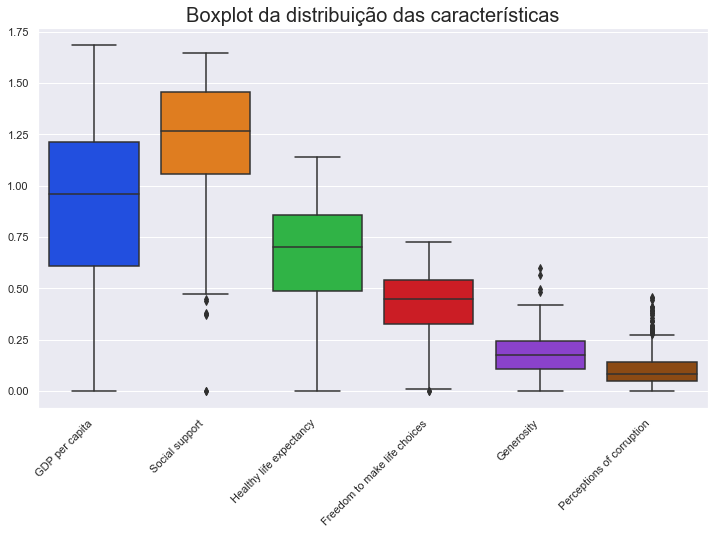

In [98]:
fig, ax = plt.subplots(figsize=(12,7))
sns.boxplot(data=dados.iloc[:,3:9], palette='bright')
plt.xticks(rotation=45,ha='right');
ax.set_title("Boxplot da distribuição das características",fontsize=20)

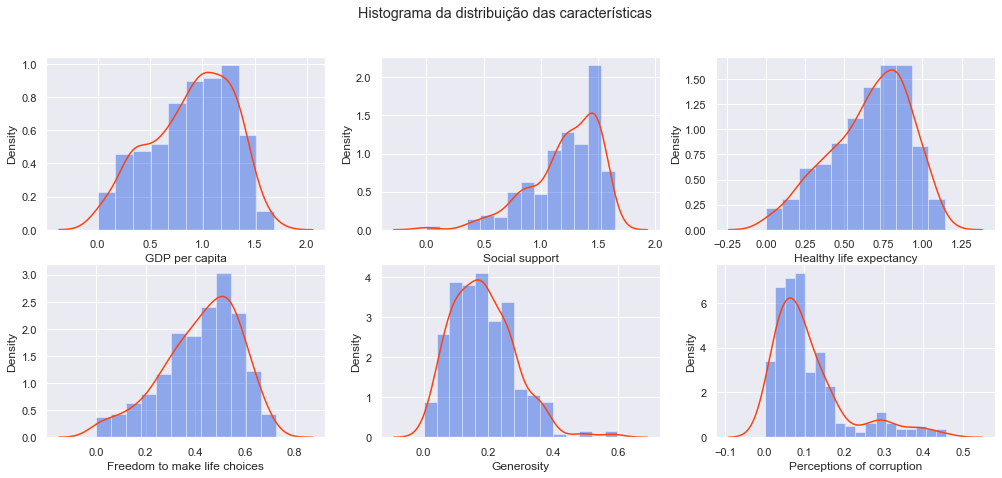

In [107]:
plt.figure(figsize=(17, 7))
for i in range(3, 9):
    plt.subplot(2, 3, i-2)
    sns.distplot(dados.iloc[:,i], color='xkcd:blue', kde_kws={'color':'xkcd:orangered'})
    plt.suptitle('Histograma da distribuição das características')

Text(0.5, 1.0, 'Score x GDP per capita 2019')

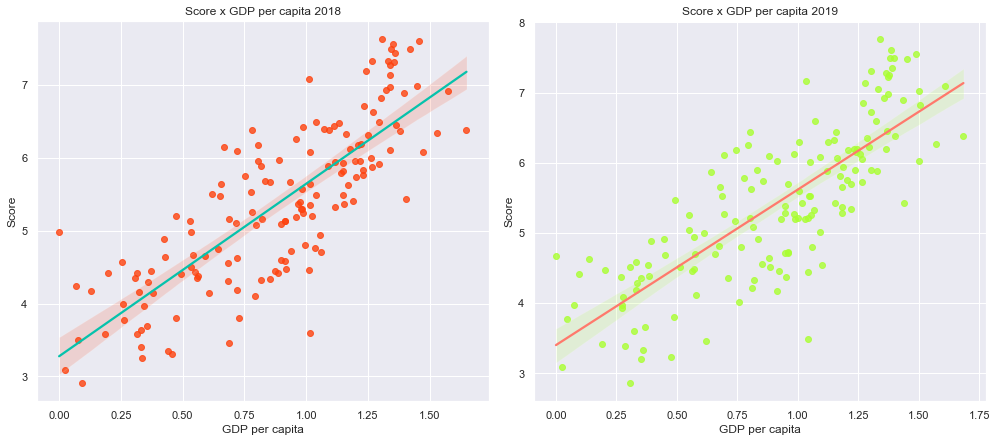

In [108]:
plt.figure(figsize=(17,7))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1,2,1)
sns.regplot(x=dados_2018['GDP per capita'], y=dados_2018.Score, data=dados_2018, color='xkcd:orangered').get_lines()[0].set_color('xkcd:turquoise')
plt.title('Score x GDP per capita 2018')
plt.subplot(1,2,2)
sns.regplot(x=dados_2019['GDP per capita'], y=dados_2019.Score, data=dados_2019, color='xkcd:lime').get_lines()[0].set_color('xkcd:salmon')
plt.title('Score x GDP per capita 2019')

Text(0.5, 1.0, 'Score x Social support 2019')

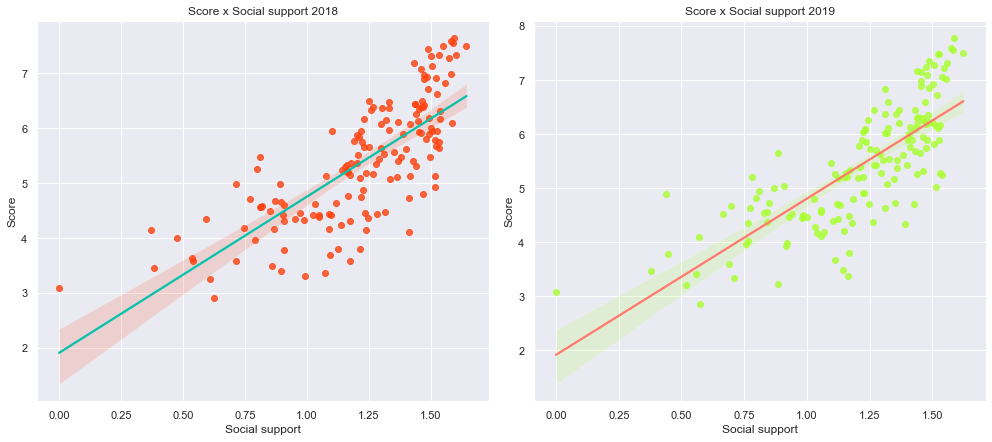

In [109]:
plt.figure(figsize=(17,7))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1,2,1)
sns.regplot(x=dados_2018['Social support'], y=dados_2018.Score, data=dados_2018, color='xkcd:orangered').get_lines()[0].set_color('xkcd:turquoise')
plt.title('Score x Social support 2018')
plt.subplot(1,2,2)
sns.regplot(x=dados_2019['Social support'], y=dados_2019.Score, data=dados_2019, color='xkcd:lime').get_lines()[0].set_color('xkcd:salmon')
plt.title('Score x Social support 2019')

Text(0.5, 1.0, 'Score x Healthy life expectancy 2019')

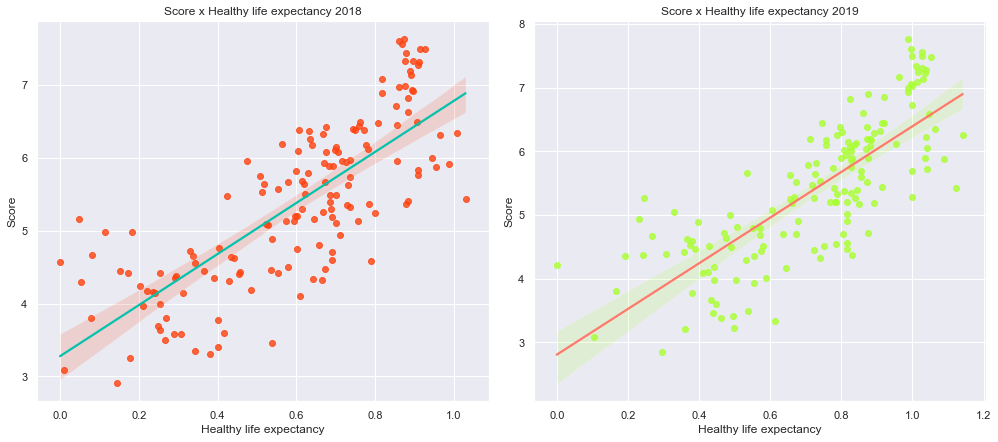

In [110]:
plt.figure(figsize=(17,7))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1,2,1)
sns.regplot(x=dados_2018['Healthy life expectancy'], y=dados_2018.Score, data=dados_2018, color='xkcd:orangered').get_lines()[0].set_color('xkcd:turquoise')
plt.title('Score x Healthy life expectancy 2018')
plt.subplot(1,2,2)
sns.regplot(x=dados_2019['Healthy life expectancy'], y=dados_2019.Score, data=dados_2019, color='xkcd:lime').get_lines()[0].set_color('xkcd:salmon')
plt.title('Score x Healthy life expectancy 2019')

Text(0.5, 1.0, 'Score x Freedom to make life choices 2019')

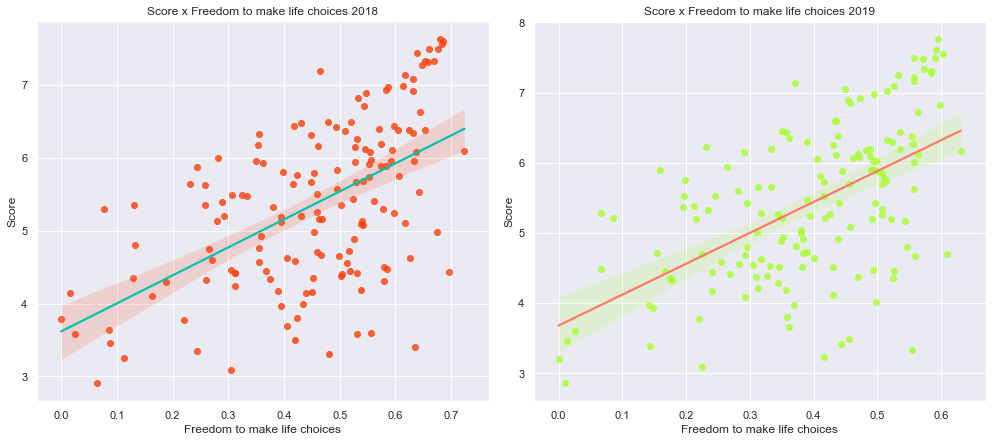

In [111]:
plt.figure(figsize=(17,7))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1,2,1)
sns.regplot(x=dados_2018['Freedom to make life choices'], y=dados_2018.Score, data=dados_2018, color='xkcd:orangered').get_lines()[0].set_color('xkcd:turquoise')
plt.title('Score x Freedom to make life choices 2018')
plt.subplot(1,2,2)
sns.regplot(x=dados_2019['Freedom to make life choices'], y=dados_2019.Score, data=dados_2019, color='xkcd:lime').get_lines()[0].set_color('xkcd:salmon')
plt.title('Score x Freedom to make life choices 2019')

Text(0.5, 1.0, 'Score x Generosity 2019')

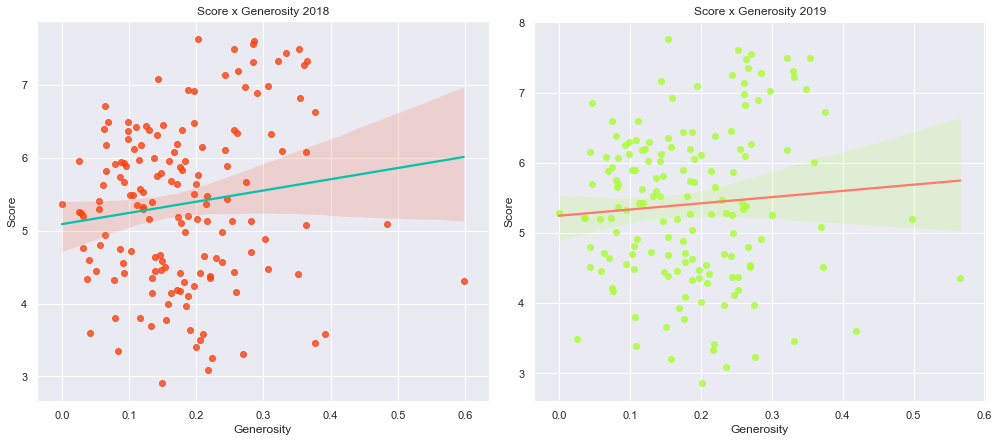

In [112]:
plt.figure(figsize=(17,7))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1,2,1)
sns.regplot(x=dados_2018.Generosity, y=dados_2018.Score, data=dados_2018, color='xkcd:orangered').get_lines()[0].set_color('xkcd:turquoise')
plt.title('Score x Generosity 2018')
plt.subplot(1,2,2)
sns.regplot(x=dados_2019.Generosity, y=dados_2019.Score, data=dados_2019, color='xkcd:lime').get_lines()[0].set_color('xkcd:salmon')
plt.title('Score x Generosity 2019')

Text(0.5, 1.0, 'Score x Perceptions of corruption 2019')

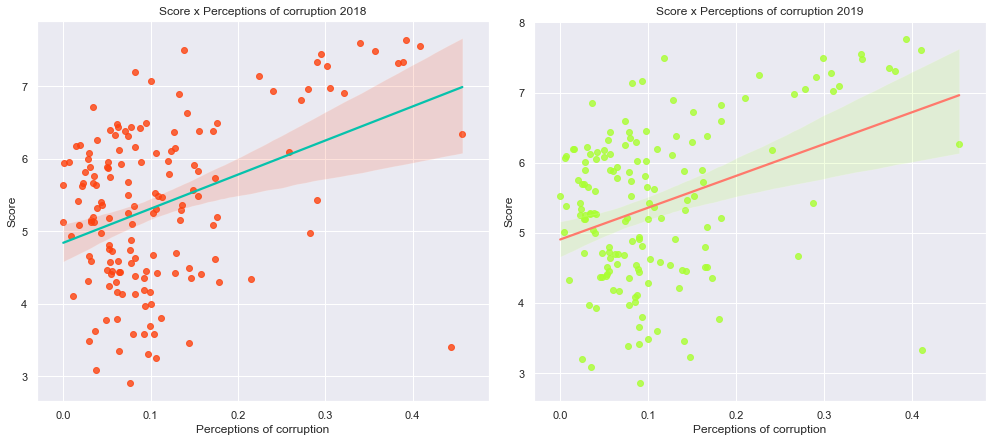

In [113]:
plt.figure(figsize=(17,7))
plt.subplots_adjust(wspace=0.1)
plt.subplot(1,2,1)
sns.regplot(x=dados_2018['Perceptions of corruption'], y=dados_2018.Score, data=dados_2018, color='xkcd:orangered').get_lines()[0].set_color('xkcd:turquoise')
plt.title('Score x Perceptions of corruption 2018')
plt.subplot(1,2,2)
sns.regplot(x=dados_2019['Perceptions of corruption'], y=dados_2019.Score, data=dados_2019, color='xkcd:lime').get_lines()[0].set_color('xkcd:salmon')
plt.title('Score x Perceptions of corruption 2019')

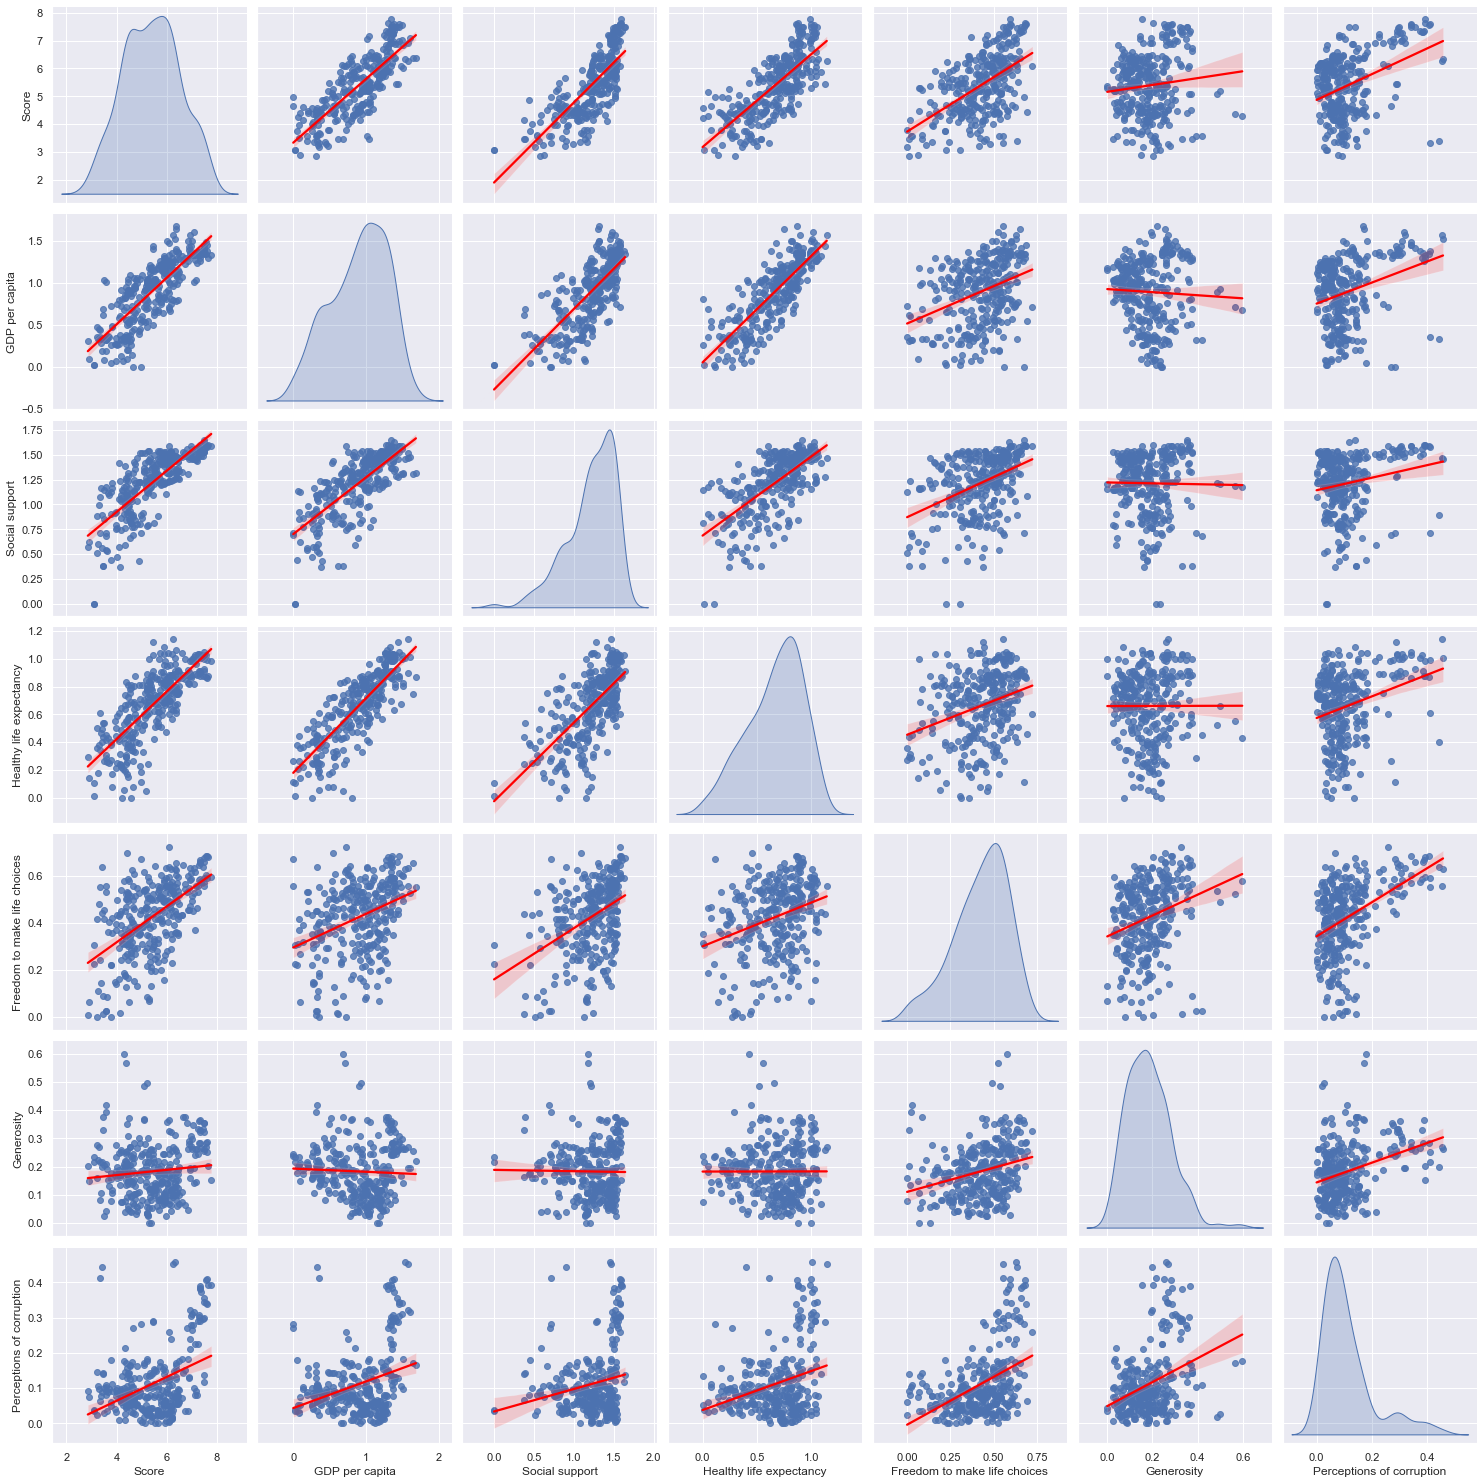

In [121]:
sns.pairplot(dados.iloc[:,2:9],diag_kind='kde',kind='reg',plot_kws={'line_kws':{'color':'red'}}, height=3);

Text(0.5, 1, 'Heatmap correlação 2019')

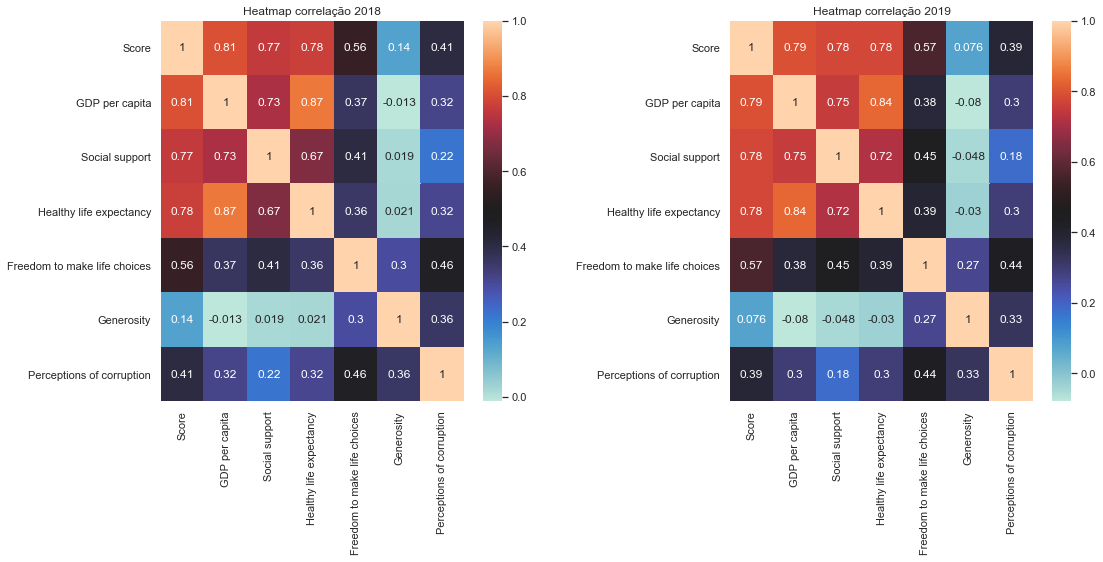

In [120]:
#heatmap correlações
plt.figure(figsize=(17,7))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
sns.heatmap(dados_2018.iloc[:,2:9].corr(), annot=True, cmap='icefire')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Heatmap correlação 2018')
plt.subplot(1,2,2)
sns.heatmap(dados_2019.iloc[:,2:9].corr(), annot=True, cmap='icefire')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Heatmap correlação 2019')

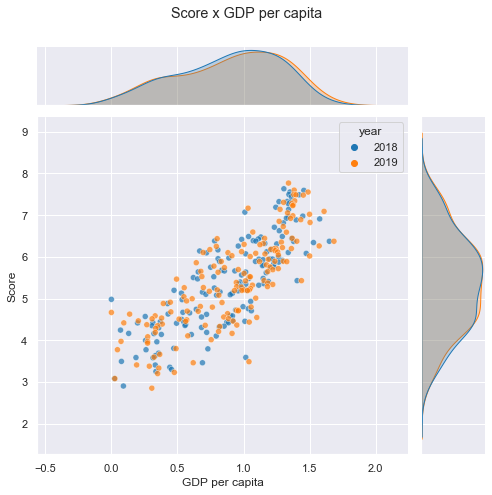

In [47]:
p = sns.jointplot(x="GDP per capita", y="Score", data=dados, kind='scatter', hue='year', palette='tab10', alpha=0.7, height=7)
p.fig.suptitle("Score x GDP per capita")
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.9)